In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, confusion_matrix
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file_name = 'winequality-red.csv'

In [5]:
wine_data = pd.read_csv(file_name)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_data_m = pd.read_csv(file_name)

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
wine_data.shape


(1599, 12)

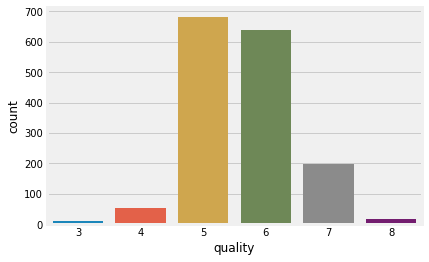

In [10]:
sns.countplot(x='quality', data=wine_data)
plt.show()


In [11]:
for i in list(wine_data_m.columns):
    Max = np.max(wine_data_m[i])
    Min = np.min(wine_data_m[i])
    wine_data_m[i] = (wine_data_m[i] - Min)/(Max - Min)

In [12]:
wine_data_m.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [13]:
# correlation = wine_data.corr()
# correlation

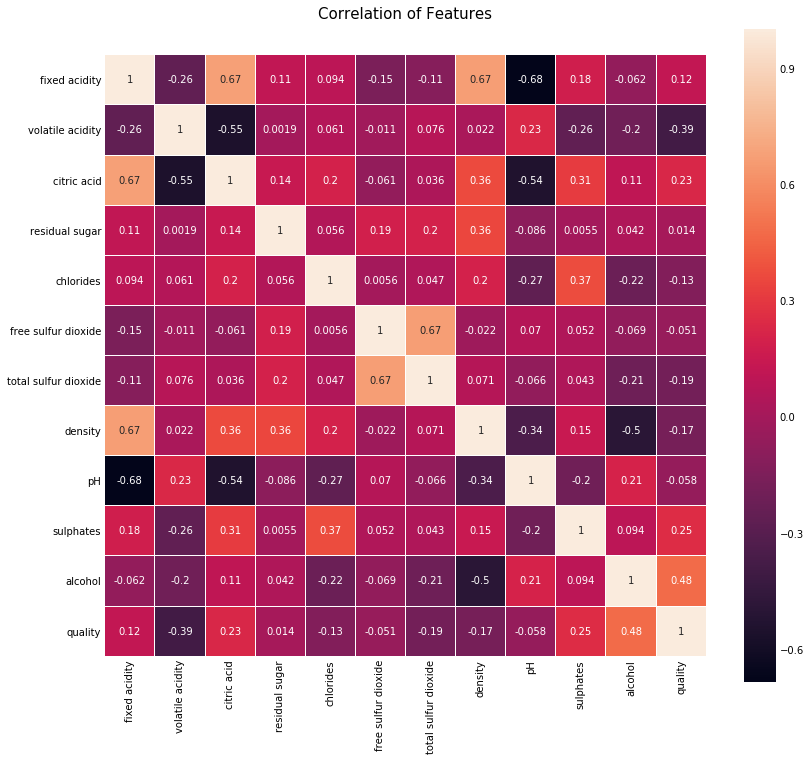

In [14]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(wine_data_m.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.draw()
    plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

## Logistics Regression

### Accuracy of train: 0.7404222048475372
### Accuracy of test: 0.75

In [16]:
df_X = wine_data.drop('quality',axis=1)
df_y = wine_data.quality
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,
                                                    random_state=0,
                                                    test_size = 0.2)

In [17]:
wine_data['quality_class']='NULL'

In [18]:
wine_data['quality_class'][wine_data['quality'] <= 6]='0'
wine_data['quality_class'][wine_data['quality'] > 6]='1'


/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yanwuyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df_X_1 = wine_data.drop(['quality_class','quality'],axis=1)
df_y_1 = wine_data.quality_class
X_train, X_test, y_train_1, y_test_1 = train_test_split(df_X_1, df_y_1,
                                                    random_state = 0,
                                                    test_size = 0.20)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [21]:
wine_data['quality_class'].value_counts()

0    1382
1     217
Name: quality_class, dtype: int64

In [22]:
wine_data.quality_class.head()

0    0
1    0
2    0
3    0
4    0
Name: quality_class, dtype: object

In [23]:
log_reg_model = LogisticRegression().fit(X_train, y_train_1)
log_reg_pred = log_reg_model.predict(X_test)
print("Accuracy of test:",accuracy_score(log_reg_pred,y_test_1))


Accuracy of test: 0.903125


In [24]:
confusion_matrix(y_test_1, log_reg_pred)
 
print(classification_report(y_test_1, log_reg_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       290
           1       0.48      0.40      0.44        30

    accuracy                           0.90       320
   macro avg       0.71      0.68      0.69       320
weighted avg       0.90      0.90      0.90       320



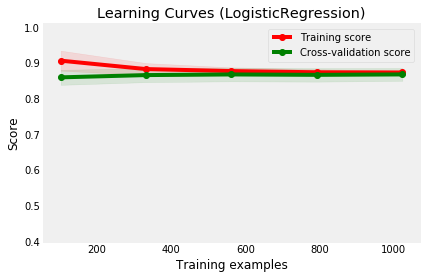

(0.8644419584200838, 0.028550566173352054)

In [25]:
title = "Learning Curves (LogisticRegression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train_1, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## KNN
### Accuracy of test:  0.646875

In [26]:
# wine_data['quality'] = np.where(wine_data['quality'] > 6,1,0)
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
# X = wine_data.drop('quality',axis=1).values
# y = wine_data.quality.values
X_train, X_test, y_train, y_test = train_test_split(df_X_1, df_y_1,
                                                    stratify = df_y_1,
                                                    random_state = 0,
                                                    test_size = 0.20)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
neighbors


KNeighborsClassifier(n_neighbors=4)

In [29]:
# Predict using 3-NN Classifier
y_hat = neighbors.predict(X_test)
y_hat[0:5]


array(['0', '0', '0', '1', '0'], dtype=object)

In [30]:
print("Accuracy of train: ", metrics.accuracy_score(y_train, neighbors.predict(X_train)))
print("Accuracy of test: ", metrics.accuracy_score(y_test, y_hat))


Accuracy of train:  0.8991399530883503
Accuracy of test:  0.878125


In [31]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat=neighbors.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)

    
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

mean_acc

array([0.86875 , 0.865625, 0.853125, 0.878125, 0.871875, 0.865625,
       0.859375, 0.859375, 0.846875])

In [32]:
print( "The best accuracy of", mean_acc.max(), "was measured with k=", mean_acc.argmax()+1) 


The best accuracy of 0.878125 was measured with k= 4


In [33]:
confusion_matrix(y_test, y_hat)
 
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       277
           1       0.29      0.09      0.14        43

    accuracy                           0.85       320
   macro avg       0.58      0.53      0.53       320
weighted avg       0.79      0.85      0.81       320



In [34]:
roc_auc_score(y_test, y_hat)

0.5284610863907313

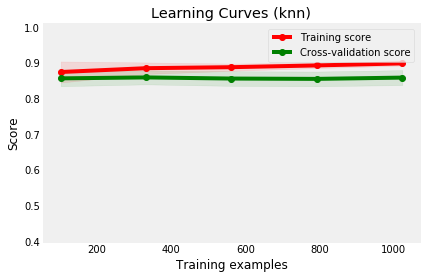

(0.8717491079368473, 0.06698582581690149)

In [35]:
title = "Learning Curves (knn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Naive Bayes
### Accuracy of train: 0.5496481626270524
### Accuracy of test: 0.540625

In [36]:
from sklearn.naive_bayes import GaussianNB
# X = wine_data.drop(columns=['quality'])
# y = wine_data[['quality']]

X_train, X_test, y_train, y_test = train_test_split(df_X_1, df_y_1, 
                                                    test_size = 0.2,
                                                   random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train
                          )
X_test = scaler.transform(X_test)


In [37]:
df_y_1.value_counts()

0    1382
1     217
Name: quality_class, dtype: int64

In [38]:
nb_model = GaussianNB().fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)
#print("Accuracy of train:",nb_model.score(X_train,y_train))
print("Accuracy of test:",accuracy_score(nb_pred,y_test))


Accuracy of test: 0.825


In [39]:
#predictions
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,nb_model_preds))


              precision    recall  f1-score   support

           0       0.98      0.83      0.90       290
           1       0.32      0.80      0.46        30

    accuracy                           0.82       320
   macro avg       0.65      0.81      0.68       320
weighted avg       0.91      0.82      0.85       320



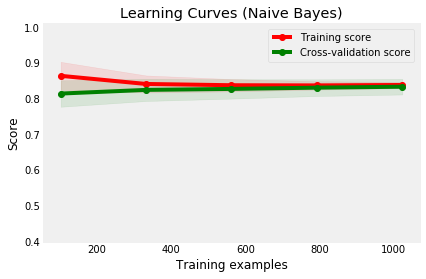

(0.8295123752767355, 0.035391641331060875)

In [40]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)



# SVC

In [41]:
from sklearn.svm import SVC

# X = df_used.drop(columns=['quality'])
# y = df_used[['quality']]

X_train, X_test, y_train, y_test = train_test_split(df_X_1, df_y_1, 
                                                    test_size = 0.2,
                                                   random_state = 0)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train
                          )
X_test = scaler.transform(X_test)

model_SVC = SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
model_SVC.fit(X_train, y_train)


SVC(C=0.8, gamma=20)

In [42]:
pred_SVC = model_SVC.predict(X_test)
print("Accuracy of test:",accuracy_score(pred_SVC,y_test))


Accuracy of test: 0.909375


In [43]:
pred_SVC = nb_model.predict(X_test)
print(classification_report(y_test,pred_SVC))



              precision    recall  f1-score   support

           0       0.98      0.83      0.90       290
           1       0.32      0.80      0.46        30

    accuracy                           0.82       320
   macro avg       0.65      0.81      0.68       320
weighted avg       0.91      0.82      0.85       320



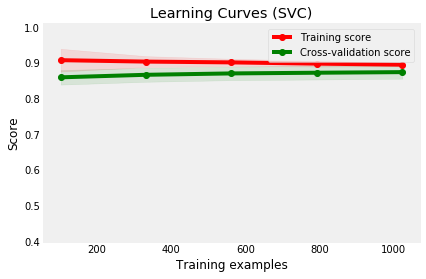

(0.8782234877320219, 0.04389707453498526)

In [44]:
title = "Learning Curves (SVC)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

## Random Forest
### Accuracy of train: 1.0
### Accuracy of test: 0.721875

In [50]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_X_1, df_y_1, 
                                                    test_size = 0.2,
                                                   random_state = 0
                                                   )
params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}

rf_model = RandomForestClassifier(max_depth = 10,
          max_features=2,
          n_estimators=100,
          min_samples_split=2).fit(X_train, y_train)
#cv = rf_model,params,cv=10,verbose=False,n_jobs=-1
rf_pred = rf_model.predict(X_test)


rf_pred_train = rf_model.predict(X_train)

print("Accuracy of train:",accuracy_score(rf_pred_train,y_train))
print("Accuracy of test:",accuracy_score(rf_pred,y_test))


Accuracy of train: 0.9929632525410477
Accuracy of test: 0.934375


In [51]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 100, 500],
          "min_samples_split": [2, 5, 10]}

cv = GridSearchCV(rf_model,params,cv=10,verbose=False,n_jobs=-1).fit(X_train,y_train)
print(cv.best_params_)
print(cv.best_score_)


{'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}
0.9343


In [47]:
nb_model_preds = nb_model.predict(X_test)
print(classification_report(y_test,rf_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       290
           1       0.62      0.60      0.61        30

    accuracy                           0.93       320
   macro avg       0.79      0.78      0.79       320
weighted avg       0.93      0.93      0.93       320



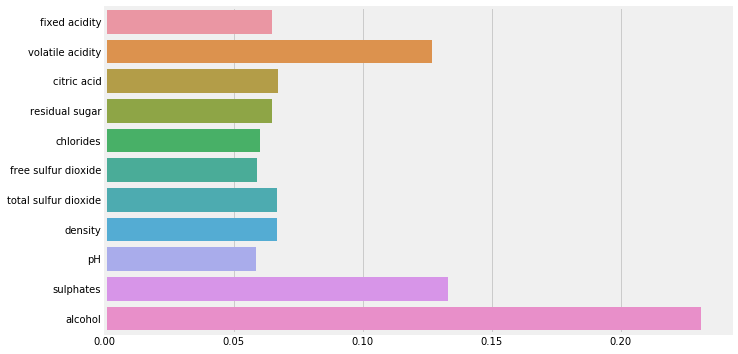

In [48]:
#Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=df_X_1.columns)
plt.show()


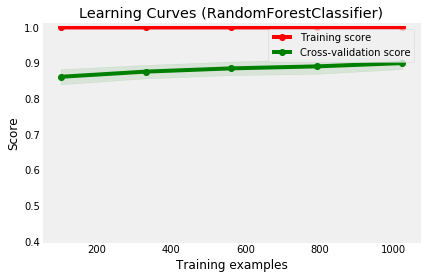

(0.941711090822601, 0.11690615647244618)

In [49]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, n_jobs=4)

